# Exercise: Dimensionality Reduction and Clustering



### Part 1: Dimentionality reduction

Use PCA to reduce the dimension of the Wisconson breast cancer dataset (from 30 features to 2 principle components), then apply supervised learning (logistic regression) using two principle components only. Steps:
    
 (a) Scale the data using StandardScaler (zero mean and unit variance variables), then apply PCA to the scaled training data to get two principle components. Print the shape of the training data before and after PCA is applied. (4 pts)
    
 (b) Print the variance explained by each of the two principle components (2 pts)
    
 (c) Use the two principle components to fit a logistic regression model with regularization parameter c=10. Find the accuracy. Compare it to the accuracy when all the original features (30 features) are used to fit the logistic regression model. (4 pts)




In [8]:
% matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing



cancer = load_breast_cancer()
X_train, X_test, Y_train, Y_test = train_test_split(cancer.data,cancer.target,random_state=0)
scaler=preprocessing.StandardScaler().fit(X_train) 
X_train_transformed=scaler.transform(X_train) 
X_test_transformed=scaler.transform(X_test)
print("shape before pca is ",X_train_transformed.shape)
Data_pca= PCA(n_components=2).fit(X_train_transformed)
X_train_pca= Data_pca.transform(X_train_transformed)
print("shape after pca is ",X_train_pca.shape)


shape before pca is  (426, 30)
shape after pca is  (426, 2)


In [9]:
print('Explained variance,' , Data_pca.explained_variance_ratio_) 

Explained variance, [0.43315126 0.19586506]


In [12]:
X_test_pca= Data_pca.transform(X_test_transformed)
LogRegModel= LogisticRegression(C=10).fit(X_train_pca, Y_train)
print("the accuracy of the model with only the principle components is",LogRegModel.score(X_test_pca,Y_test))

LogRegModel1= LogisticRegression(C=10).fit(X_train_transformed, Y_train)
print("the accuracy of the model with all the features is",LogRegModel1.score(X_test_transformed,Y_test))

the accuracy of the model with only the principle components is 0.951048951048951
the accuracy of the model with all the features is 0.9440559440559441


### Part 2: clustering 

Assume we do not know the actual labels, and use clustering algorithms on the training samples using the two derived principle components only.

(a) Apply K-means with random_state=0, and K=2. Use scatter plot to visualize the output of K-Means clustering algorithm. (x-axis is first principle component and y-axis is the second principle component). Also plot the actual labels. (4pt)
    
(b) Use the actual labels of Y_train to find the K-means clustering score using the adjusted_rand_score. (2pts)
    
(c) Find the adjusted_rand_score if we used agglomerative clustering setting number of clusters to 2, using default linkage (Ward). (4pts)

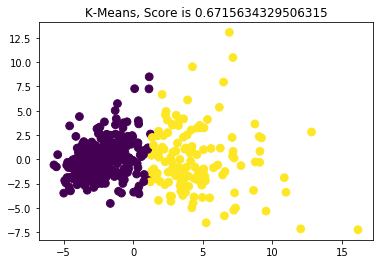

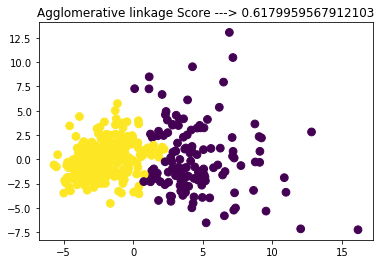

In [19]:
kmeans= KMeans(n_clusters=2, random_state=0).fit_predict(X_train_pca)
score_Kmeans=adjusted_rand_score(kmeans,Y_train)

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=kmeans, s=60)
plt.title("K-Means, Score is %s" %score_Kmeans )
plt.show()

clusters_Agglomerative = AgglomerativeClustering(n_clusters=2, linkage='ward').fit_predict(X_train_pca)
score_Agglomerative=adjusted_rand_score(clusters_Agglomerative,Y_train)

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=clusters_Agglomerative, s=60)
plt.title("Agglomerative linkage Score ---> %s" %score_Agglomerative )
plt.show()